<a href="https://colab.research.google.com/github/MohdIstiaqHossainJunaid/Bangla-Hate-Speech-Detection-In-videos/blob/main/CSE419(Hate_Speech_Detection_using_ML_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bangla Hate Speech Detection from videos**(Machine Learning Techniques)

# Group Number : 03
     
1.   Mohd Istiaq Hossain Junaid - 1821577642
2.   Faisal Hossain             - 1821500042







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import string 
import cufflinks as cf
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
import pandas as pd
import io
df = pd.read_csv("vid.csv")
df.sample(frac=1)



,Serial,Youtube_ID,Speech,Label
138,139,https://www.youtube.com/watch?v=JgP5LmTWRRg,"জানতে যে আপনারা? আমাকে গালাগালি দিন, খিস্তি দি...",1
84,85,https://www.youtube.com/watch?v=uApmvqXTdV4,প্রায় দেড় বছর পর বারো September খুলছে শিক্ষা...,0
112,113,https://www.youtube.com/watch?v=GwXjuiZhmgQ,আমি চারবার কইরা দিমু আমার কুত্তা দিয়া দিমু ওই ...,1
92,93,https://www.youtube.com/watch?v=d0DMzMUu4EI,পি কে হালদারের দেশত্যাগের সময় বেনাপোল ইমিগ্রে...,0
27,28,https://www.youtube.com/watch?v=fALKprMyy3M&ab...,বিশেষ হেলিকপ্টারটি তখন বাংলাদেশ মায়ানমার সীমা...,0
...,...,...,...,...
113,114,https://www.youtube.com/watch?v=3CW4M1YvwQs,প্রেম দা সকালে কি হয়েছিল আপনার? জঙ্গলে হারিয়...,1
68,69,https://www.youtube.com/watch?v=4iUOVbtUeds,বিয়ে করেছেন বাংলাদেশের ছোট পর্দার জনপ্রিয় অভ...,0
121,122,https://www.youtube.com/watch?v=YKuD3AWFV0s,"ওই কোন কিরে? শালা, ঠিক করে গাড়ি চালাতে পারিস ...",1
72,73,https://www.youtube.com/watch?v=-HTlu0QcmRY,রোগীবাহী ট্রলি থেকে হাসপাতালের sit দালাল ছাড়া...,0


## Removing punctuations

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [ ]:
df['msg_clean'] = df['Speech'].apply(lambda x:remove_punctuation(x))
df.head()

,Serial,Youtube_ID,Speech,Label,msg_clean
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...


In [ ]:
pip install bnlp_toolkit


     |████████████████████████████████| 23.9 MB 95 kB/s 
     |████████████████████████████████| 1.2 MB 32.8 MB/s 
     |████████████████████████████████| 743 kB 46.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


## **Bangla Tokenization and Bangla Stopword Removing**

In [ ]:
from bnlp import BasicTokenizer
basic_tokenizer = BasicTokenizer()

df['tokenized'] = df['msg_clean'].apply(lambda x: basic_tokenizer.tokenize(x))


punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import csv
stop_words='/content/drive/MyDrive/Playing with Data/CSE419 (Hate Speech Detection From videos)/stopwords-bn.txt'
text_data=[]
with open(stop_words,'r',encoding='utf-8') as temp_output_file:
    reader=csv.reader(temp_output_file, delimiter='\n')
    for row in reader:
        text_data.append(row)
stop_word_list=[x[0] for x in text_data]
print(stop_word_list[0:100])
print(type(stop_word_list))

FileNotFoundError: ignored

In [ ]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

df['Removed Stopped word'] = df['msg_clean'].apply(lambda x: remove_stopwords(x,stopwords))
df 

,Serial,Youtube_ID,Speech,Label,msg_clean,tokenized,Removed Stopped word
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...,"[এত, রাত, BNP, রা, এখানে, যে, গালাগালি, দেতাসে...","[রাত, BNP, রা, গালাগালি, দেতাসে, এক, Facebook,..."
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,"[জীবনের, যারা, মুক্তি, চাইতেছে, আমি, তারা, বাই...","[জীবনের, মুক্তি, চাইতেছে, বাইরে, আসো, কথাবার্ত..."
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...,"[আচ্ছা, ও, কি, একদম, পাগল, হয়ে, গেল, নাকি, নি...","[আচ্ছা, একদম, পাগল, নির্লজ্জ, বেহায়া, ছোটলোক,..."
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,"[আমাকে, পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার...","[পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার, জামা,..."
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...,"[এ, সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়...","[সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়াই,..."
...,...,...,...,...,...,...,...
187,188,https://www.youtube.com/watch?v=gYs1hny8j7s,কালকিনি উপজেলার ডাসার থানা পূর্ব বদলা গ্রামের ...,0,কালকিনি উপজেলার ডাসার থানা পূর্ব বদলা গ্রামের ...,"[কালকিনি, উপজেলার, ডাসার, থানা, পূর্ব, বদলা, গ...","[কালকিনি, উপজেলার, ডাসার, থানা, পূর্ব, বদলা, গ..."
188,189,https://www.youtube.com/watch?v=bwR3C_qIYyQ,হবিগঞ্জের বানিয়াচক উপজেলার জল মোহন নিয়ে কামা...,0,হবিগঞ্জের বানিয়াচক উপজেলার জল মোহন নিয়ে কামা...,"[হবিগঞ্জের, বানিয়াচক, উপজেলার, জল, মোহন, নিয়...","[হবিগঞ্জের, বানিয়াচক, উপজেলার, জল, মোহন, কামা..."
189,190,https://www.youtube.com/watch?v=KiP8gWUK83M,অব্যবস্থাপনা নিয়ে টিকা প্রত্যাশীদের এই ক্ষোভ....,0,অব্যবস্থাপনা নিয়ে টিকা প্রত্যাশীদের এই ক্ষোভ ...,"[অব্যবস্থাপনা, নিয়ে, টিকা, প্রত্যাশীদের, এই, ...","[অব্যবস্থাপনা, টিকা, প্রত্যাশীদের, ক্ষোভ, ভোর,..."
190,191,https://www.youtube.com/watch?v=NrIUfA6RZJk&ab...,এই শিশু কিশোরদের আটক করা হয়েছে কক্সবাজার থেকে...,0,এই শিশু কিশোরদের আটক করা হয়েছে কক্সবাজার থেকে...,"[এই, শিশু, কিশোরদের, আটক, করা, হয়েছে, কক্সবাজ...","[শিশু, কিশোরদের, আটক, কক্সবাজার, চট্টগ্রাম, আস..."


In [ ]:
df['sentence']=df['Removed Stopped word'].apply(' '.join)
df.head(10)

,Serial,Youtube_ID,Speech,Label,msg_clean,tokenized,Removed Stopped word,sentence
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...,"[এত, রাত, BNP, রা, এখানে, যে, গালাগালি, দেতাসে...","[রাত, BNP, রা, গালাগালি, দেতাসে, এক, Facebook,...",রাত BNP রা গালাগালি দেতাসে এক Facebook থাকতেও ...
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,"[জীবনের, যারা, মুক্তি, চাইতেছে, আমি, তারা, বাই...","[জীবনের, মুক্তি, চাইতেছে, বাইরে, আসো, কথাবার্ত...",জীবনের মুক্তি চাইতেছে বাইরে আসো কথাবার্তা পরিম...
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...,"[আচ্ছা, ও, কি, একদম, পাগল, হয়ে, গেল, নাকি, নি...","[আচ্ছা, একদম, পাগল, নির্লজ্জ, বেহায়া, ছোটলোক,...",আচ্ছা একদম পাগল নির্লজ্জ বেহায়া ছোটলোক বাজদার...
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,"[আমাকে, পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার...","[পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার, জামা,...",পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা কাপড় ধ...
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...,"[এ, সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়...","[সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়াই,...",সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর তুই...
5,6,https://www.youtube.com/watch?v=e_WmL_r7PYM,"চৌধুরী ভাইকে মুর্তাজ বলেছে, ওর মেয়ের ভোদার মধ...",1,চৌধুরী ভাইকে মুর্তাজ বলেছে ওর মেয়ের ভোদার মধ্...,"[চৌধুরী, ভাইকে, মুর্তাজ, বলেছে, ওর, মেয়ের, ভো...","[চৌধুরী, ভাইকে, মুর্তাজ, বলেছে, মেয়ের, ভোদার,...",চৌধুরী ভাইকে মুর্তাজ বলেছে মেয়ের ভোদার মেয়ের...
6,7,https://www.youtube.com/watch?v=E9cRLh49gSg,দুই লাখ ছোটো লোক হারামজাদা বেদাত মূর্খ মালয়েশ...,1,দুই লাখ ছোটো লোক হারামজাদা বেদাত মূর্খ মালয়েশ...,"[দুই, লাখ, ছোটো, লোক, হারামজাদা, বেদাত, মূর্খ,...","[লাখ, ছোটো, লোক, হারামজাদা, বেদাত, মূর্খ, মালয...",লাখ ছোটো লোক হারামজাদা বেদাত মূর্খ মালয়েশিয়া...
7,8,https://www.youtube.com/watch?v=f6dEVjhqvQc,চলে যায়. দেখছোস যে আজকে আমি মদ খাইতাছি এখন re...,1,চলে যায় দেখছোস যে আজকে আমি মদ খাইতাছি এখন red...,"[চলে, যায়, দেখছোস, যে, আজকে, আমি, মদ, খাইতাছি...","[দেখছোস, আজকে, মদ, খাইতাছি, red, one, খাইতাসি,...",দেখছোস আজকে মদ খাইতাছি red one খাইতাসি মদ খাইত...
8,9,https://www.youtube.com/watch?v=g843KlAIm-8,আজকে জাতির সামনে আমি বেয়াদপ ভাইয়া আমি আজকে গ...,1,আজকে জাতির সামনে আমি বেয়াদপ ভাইয়া আমি আজকে গ...,"[আজকে, জাতির, সামনে, আমি, বেয়াদপ, ভাইয়া, আমি...","[আজকে, জাতির, বেয়াদপ, ভাইয়া, আজকে, গালি, দিব...",আজকে জাতির বেয়াদপ ভাইয়া আজকে গালি দিবো তোমাদ...
9,10,https://www.youtube.com/watch?v=gtOYF4PtTQw,"ছাত্রলীগের গুষ্ঠি চুরি, আওয়ামী লীগের গুষ্ঠী চ...",1,ছাত্রলীগের গুষ্ঠি চুরি আওয়ামী লীগের গুষ্ঠী চু...,"[ছাত্রলীগের, গুষ্ঠি, চুরি, আওয়ামী, লীগের, গুষ...","[ছাত্রলীগের, গুষ্ঠি, চুরি, আওয়ামী, লীগের, গুষ...",ছাত্রলীগের গুষ্ঠি চুরি আওয়ামী লীগের গুষ্ঠী চু...


In [ ]:
df['Label'].value_counts()

0    99
1    93
Name: Label, dtype: int64

##**Machine Learning Models Applied**
1. **Linear SVC**
2. **Multinomial Naive Bayes**
3. **Logistic regression**
4.**Decision Tree**

**TfidfVectorizer**

In [ ]:
X=df['sentence']
y=df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfvect = vectorizer.fit_transform(X_train)
X_train_tfvect.shape
X_test_tfvect=vectorizer.fit_transform(X_test)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Serial                192 non-null    int64 
 1   Youtube_ID            192 non-null    object
 2   Speech                192 non-null    object
 3   Label                 192 non-null    int64 
 4   msg_clean             192 non-null    object
 5   tokenized             192 non-null    object
 6   Removed Stopped word  192 non-null    object
 7   sentence              192 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.1+ KB


## **Linear SVC**

In [ ]:
clf = LinearSVC()
clf.fit(X_train_tfvect,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
predictions=text_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[22  1]
 [ 0 16]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        16

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



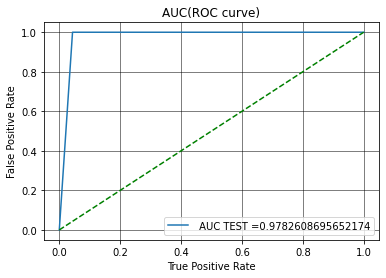

In [ ]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## **Multinomial Naive Bayes**

In [ ]:
nb_model = MultinomialNB()

nb_model.fit(X_train_tfvect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('nb_model',MultinomialNB())])
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions=text_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[22  1]
 [ 0 16]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        16

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



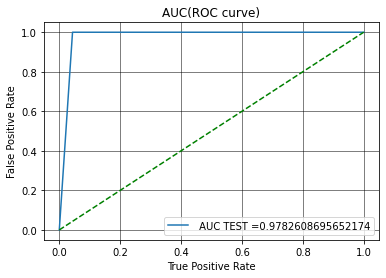

In [ ]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
mlnb = MultinomialNB()
mlnb.fit(X_train_tfvect, y_train)
predictions = mlnb.predict(x_test_count_tfidf)
print("\nAccuracy : ", accuracy_score(predictions, y_test))

probs = mlnb.predict_proba(x_test_count_tfidf)
preds = probs[:,1]
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_test, preds)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

    # method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for Naive Bayes')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfvect,y_train)
text_lr=Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])
text_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [ ]:
predictions=text_lr.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))

[[22  1]
 [ 0 16]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        16

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



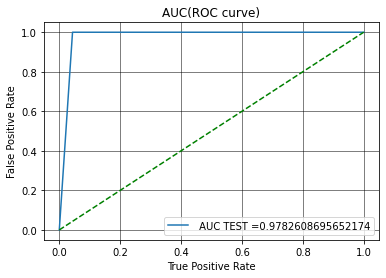

In [ ]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_tfvect,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
text_dt=Pipeline([('tfidf',TfidfVectorizer()),('clf',DecisionTreeClassifier())])
text_dt.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

In [ ]:
predictions=text_dt.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))

[[19  4]
 [ 4 12]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.75      0.75      0.75        16

    accuracy                           0.79        39
   macro avg       0.79      0.79      0.79        39
weighted avg       0.79      0.79      0.79        39



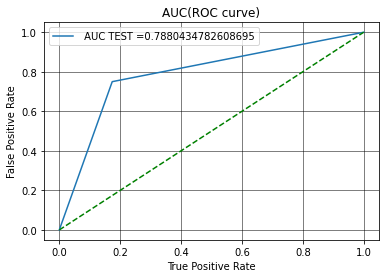

In [ ]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()